# Module 1.2 - Apply Quantum Operations

## Section 1.2.0: Overview

This module focuses on applying quantum operations to qubits using Qiskit v2.x.  
You will connect common gates to their unitary matrices, compose them on circuits,  
and verify results via state evolution.  Emphasis is on correctness, gate ordering,  
and reproducible execution on a realistic fake backend.  

 
- Section 1.2.1 Gate Tensor Products 
- Section 1.2.2 Operator class 
- Section 1.2.3 Pauli class 
- Section 1.2.4 Statevector class 
- Section 1.2.5 Measurement   
 

**IBM references**  
- Circuit library and `QuantumCircuit`:  
  https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library  
  https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit  

*Tip:* Keep circuits small, fix random seeds, and use low shot counts for quick,  
reproducible runs.  


## Section 1.2.1: Gate Tensor Products
### Review Tensor Products

Tensor products are used to describe multi-qubit systems. For example:

- $|0\rangle \otimes |0\rangle = |00\rangle$
- $|0\rangle \otimes |1\rangle = |01\rangle$
- $|+\rangle \otimes |+\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$
- $|+\rangle \otimes |-\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

In [4]:
from qiskit.quantum_info import Statevector

# Tensor product of |0> and |0>
print("Tensor |0⟩ ⊗ |0⟩ =", Statevector.from_label('00'))

# Tensor |+> ⊗ |+>
plus_plus = Statevector([0.5, 0.5, 0.5, 0.5])
print("|+⟩ ⊗ |+⟩ =", plus_plus)


Tensor |0⟩ ⊗ |0⟩ = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
|+⟩ ⊗ |+⟩ = Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


### Tensor Product of Matrices/Gates

**0) Theory**

The tensor (Kronecker) product of matrices $A \in \mathbb{C}^{m \times n}$ and  
$B \in \mathbb{C}^{p \times q}$ is the block matrix  
$A \otimes B \in \mathbb{C}^{(mp) \times (nq)}$ defined by
$$
A \otimes B \;=\;
\begin{bmatrix}
a_{00} B & a_{01} B & \cdots & a_{0,n-1} B \\
a_{10} B & a_{11} B & \cdots & a_{1,n-1} B \\
\vdots   & \vdots   & \ddots & \vdots      \\
a_{m-1,0} B & a_{m-1,1} B & \cdots & a_{m-1,n-1} B
\end{bmatrix}.
$$

Key property on tensor states:
$$
(A \otimes B)\big(\lvert u \rangle \otimes \lvert v \rangle\big)
= (A \lvert u \rangle) \otimes (B \lvert v \rangle).
$$

For $2 \times 2$ matrices (common in qubit land), if
$A=\begin{bmatrix}a&b\\ c&d\end{bmatrix}$ and
$B=\begin{bmatrix}e&f\\ g&h\end{bmatrix}$, then
$$
A \otimes B
=
\begin{bmatrix}
aB & bB \\
cB & dB
\end{bmatrix}
=
\begin{bmatrix}
ae & af & be & bf \\
ag & ah & bg & bh \\
ce & cf & de & df \\
cg & ch & dg & dh
\end{bmatrix}.
$$

> Convention note (Qiskit): $A \otimes B$ means $A$ acts on the **first**
> subsystem and $B$ on the **second**; the left factor is more significant.

**1) Qiskit implementation with `Operator` and `to_matrix()`**

Use `Operator` to wrap matrices, then call `.tensor()` to build
$A \otimes B$. Use `.to_matrix()` to get a NumPy array.


In [5]:
from qiskit.quantum_info import Operator
import numpy as np

# Define two 2x2 matrices (example: A arbitrary, B = X gate)
A = np.array([[1, 2],
              [3, 4]], dtype=complex)
B = np.array([[0, 1],
              [1, 0]], dtype=complex)  # Pauli-X

op_A = Operator(A)
op_B = Operator(B)

# Tensor product A ⊗ B (A on the first subsystem, B on the second)
op_A_kron_B = op_A.tensor(op_B)

# Get the concrete matrix
kron_matrix = op_A_kron_B.to_matrix()
print(kron_matrix)

[[0.+0.j 1.+0.j 0.+0.j 2.+0.j]
 [1.+0.j 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 3.+0.j 0.+0.j 4.+0.j]
 [3.+0.j 0.+0.j 4.+0.j 0.+0.j]]


## Section 1.2.2 – Operator Class

## **Constructors:** 

2 ways to construct:

  1)  2-d Numpy Array

  2)  QuantumCircuit

```python
import numpy as np
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
```

#### 1) Matrix (shape 2^n × 2^n)
```
A = np.array([[1, 0],
              [0, -1]], dtype=complex)   # Z
opA = Operator(A)
```

#### 2) Circuit (unitary of the circuit)
qc = QuantumCircuit(1)
qc.h(0)
opU = Operator(qc)


### Methods/Attributes:
The two most commonly tested on the exam are:

- `to_matrix()`
- `data`

### Qiskit `Operator.to_matrix()` — usage patterns

**Purpose**
- Return a **NumPy copy** of the operator’s matrix.  
- Use when you need a standalone `ndarray` (e.g., NumPy/SciPy ops, serialization).  
- `op.data` is a NumPy **view** of the stored matrix; `op.to_matrix()` returns a copy.

**From a circuit**


In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

qc = QuantumCircuit(1)
qc.h(0)

op = Operator(qc)
M = op.to_matrix()            # ndarray copy
print(type(M), M.shape)       # <class 'numpy.ndarray'> (2, 2)
print(np.allclose(M, op.data))  # True

<class 'numpy.ndarray'> (2, 2)
True


### Qiskit `Operator.data` — quick access to the matrix

**Purpose**
- Returns a **NumPy array view** of the operator’s stored matrix  
  (dimension $2^n \times 2^n$ for $n$ qubits).  
- Fast read access; if you need a **copy**, use `to_matrix()`.

**From a circuit**

In [11]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

qc = QuantumCircuit(1)
qc.h(0)

op = Operator(qc)
A = op.data                 # ndarray view
print(type(A), A.shape)     # <class 'numpy.ndarray'> (2, 2)

<class 'numpy.ndarray'> (2, 2)


### Similar to the Pauli class from Module 1.1...

In [14]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1],
              [1, 0]])
Z = Operator([[1, 0],
              [0, -1]])

U = Z @ X                   # apply X then Z
A = U.data                  # matrix view of the composition
print(A)

[[ 0.+0.j  1.+0.j]
 [-1.+0.j  0.+0.j]]


#### Common Pitfall:  There is NO `expectation_value` attribute of the Operator class
...this is in contrast to some of the other classes such as `DensityMatrix` and `Statevector` as we'll see next....

## Section 1.2.3 Statevector

1. Constructors: Array, `from_instruction`, `from_label`  
2. Attribute: `expectation_value`  
3. Attribute: `data`  
4. Common Pitfall: no `to_matrix()`


### `Statevector(<2d array>)` with an array

Construct a statevector directly from a numpy array


In [24]:
from qiskit.quantum_info import Statevector, Operator
import numpy as np

# |+> = (|0> + |1>)/sqrt(2)
psi = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
print(psi)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


### `Statevector.from_instruction` with a `QuantumCircuit` 

Construct a statevector $\,\lvert \psi \rangle\,$ directly from a circuit’s unitary
evolution.


In [18]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Example 1: single-qubit |0> --H--> |+>
qc = QuantumCircuit(1)
qc.h(0)

psi = Statevector.from_instruction(qc)
print(psi)                  # amplitudes for |0>, |1>
print(psi.data)             # NumPy array view
print(np.allclose(psi.data,
                  [1/np.sqrt(2), 1/np.sqrt(2)]))


Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
[0.70710678+0.j 0.70710678+0.j]
True


### `Statevector.from_label` with a string (Qiskit 2.2.1)

Construct a statevector $\,\lvert \psi \rangle\,$ from a **label string**.  
Single-qubit labels: `"0"`, `"1"`, `"+"`, `"-"`, `"r"=\lvert +i\rangle`, `"l"=\lvert -i\rangle`, `"i"`, `"-i"`.  
Multi-qubit labels are the tensor product of per-character states (e.g., `"0+"`).


In [21]:
from qiskit.quantum_info import Statevector
import numpy as np

# Example A: "01"  →  |0⟩ ⊗ |1⟩
psi_01 = Statevector.from_label("01")
print(psi_01.data)      # [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
print(psi_01.to_dict()) # {'01': (1+0j)}

# Example B: "0+"  →  |0⟩ ⊗ (|0⟩ + |1⟩)/√2
psi_0p = Statevector.from_label("0+")
print(psi_0p.data)      # [1/√2, 1/√2, 0, 0]
print(psi_0p.to_dict()) # {'00': (1/√2), '01': (1/√2)}

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
{np.str_('01'): np.complex128(1+0j)}
[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]
{np.str_('00'): np.complex128(0.7071067811865475+0j), np.str_('01'): np.complex128(0.7071067811865475+0j)}


### `Statevector.expectation_value` (Qiskit 2.2.1)

Compute $\langle \psi \rvert O \lvert \psi \rangle$ for a statevector and observable.

**Single-qubit example:** $\lvert + \rangle$ with $Z$


In [22]:

from qiskit.quantum_info import Statevector, Operator
import numpy as np

# |+> = (|0> + |1>)/sqrt(2)
psi = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])

Z = Operator([[1, 0],
              [0, -1]])

ev = psi.expectation_value(Z)
print(ev)  # ~0.0


(-2.2371143170757382e-17+0j)


### `Statevector.data` (Qiskit 2.2.1)

Returns a **NumPy array view** of the amplitudes of $\,\lvert \psi \rangle\,$  
(shape $2^n$, for $n$ qubits). Use when you need direct, fast access; for a copy,  
use `Statevector.to_array()`.

**Example A: single qubit \(|+\rangle\)**

In [25]:
from qiskit.quantum_info import Statevector
import numpy as np

psi = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])  # |+>
A = psi.data
print(type(A), A.shape)   # <class 'numpy.ndarray'> (2,)
print(A)                  # [0.70710678+0.j 0.70710678+0.j]


<class 'numpy.ndarray'> (2,)
[0.70710678+0.j 0.70710678+0.j]


### CommonPitfall: no `to_matrix()` for `Statevector`

`Statevector` represents a state $\,\lvert \psi \rangle\,$ (a length-$2^n$ vector), not
an operator. There is **no** `to_matrix()` method on `Statevector`.

**Use instead**
- Vector (NumPy copy):  
  ```python
  arr = psi.to_array()      # copy of amplitudes


## Section 1.2.3: Measuring Quantum Circuits (5 ways)

Map qubits to classical bits using `measure()`, or use `measure_all()` for convenience.

### Measurement Methods in Qiskit

Here are **five different ways** to measure qubits into classical bits:
1. **Single qubit → single classical bit**
   ```python
   qc.measure(0, 0)
   ```
2. **Multiple qubits → multiple classical bits**
   ```python
   qc.measure([0,1,2], [0,1,2])
   ```
3. **Measure all qubits**
   ```python
   qc.measure_all()
   ```
4. **Separate measure calls**
   ```python
   qc.measure(0, 0)
   qc.measure(1, 1)
   ```
5. **Measure a subset of qubits**
   ```python
   qc.measure([0,2], [0,1])
   ```

### Computing Measurement Probabilities (Basics)

In Qiskit, a final `measure` reads qubits in the **computational (Z) basis** $\{|0\rangle, |1\rangle\}$.  
For a single-qubit state $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ with $|\alpha|^2+|\beta|^2=1$:
- $\Pr(0)=|\alpha|^2$,  
- $\Pr(1)=|\beta|^2$.

**Rotations and amplitudes.** Many circuits prepare $|\psi\rangle$ via rotations. For example,
- $R_y(\theta)|0\rangle=\cos(\tfrac{\theta}{2})|0\rangle+\sin(\tfrac{\theta}{2})|1\rangle$, so  
  $\Pr(1)=\sin^2(\tfrac{\theta}{2})$, $\Pr(0)=\cos^2(\tfrac{\theta}{2})$.
- $H|0\rangle=\tfrac{|0\rangle+|1\rangle}{\sqrt{2}}$ gives $\Pr(0)=\Pr(1)=\tfrac{1}{2}$.

**Qiskit example.**
```python
qc.reset(0)          # prepares |0>
qc.ry(np.pi/2, 0)    # θ = π/2
qc.measure_all()
```
After $R_y(\pi/2)$:
$|\psi\rangle=\cos(\pi/4)|0\rangle+\sin(\pi/4)|1\rangle=\tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$.
Thus $\Pr(1)=\sin^2(\pi/4)=\tfrac{1}{2}=0.5$.

Takeaways.

1. Express the post-gate state in the form $\alpha|0\rangle+\beta|1\rangle$.

2.  Square magnitudes of amplitudes to get measurement probabilities.

3.  Global phases do not affect probabilities; only amplitudes’ magnitudes do.

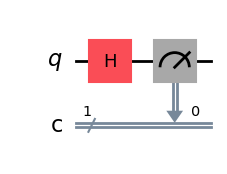

In [3]:
# 1. Single qubit → single classical bit
from qiskit import QuantumCircuit
qc1 = QuantumCircuit(1, 1)
qc1.h(0)
qc1.measure(0, 0)
qc1.draw('mpl')

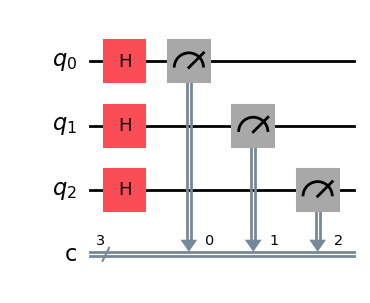

In [4]:
# 2. Multiple qubits → multiple classical bits
# The order in the arrays indicates which qubit maps to which classical bit
from qiskit import QuantumCircuit
qc2 = QuantumCircuit(3, 3)
qc2.h([0, 1, 2])
qc2.measure([0, 1, 2], [0, 1, 2])
qc2.draw('mpl')

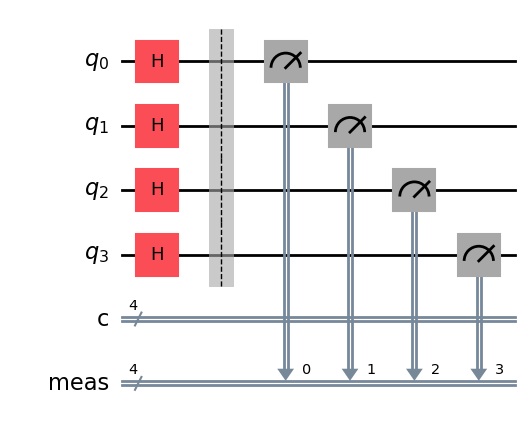

In [5]:
# 3. Measure all qubits
from qiskit import QuantumCircuit
qc3 = QuantumCircuit(4, 4)
qc3.h(range(4))
qc3.measure_all()
qc3.draw('mpl')

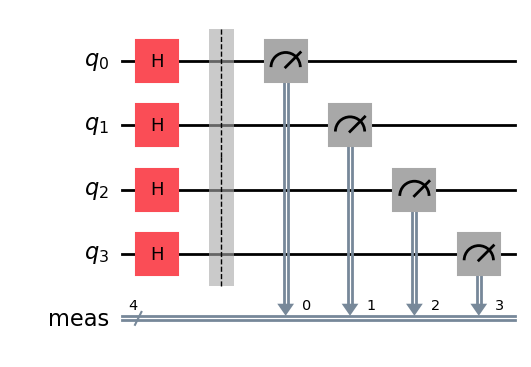

In [6]:
# Note:  If you call "measure_all()", it does not require you to create any classical registers
# The classical register to store the result is created automatically: 
from qiskit import QuantumCircuit
qc3 = QuantumCircuit(4)
qc3.h(range(4))
qc3.measure_all()
qc3.draw('mpl')

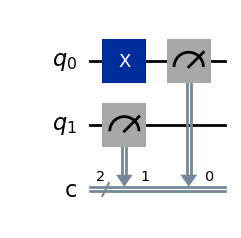

In [7]:
# 4. Separate measure calls
from qiskit import QuantumCircuit
qc4 = QuantumCircuit(2, 2)
qc4.x(0)
qc4.measure(0, 0)
qc4.measure(1, 1)
qc4.draw('mpl')

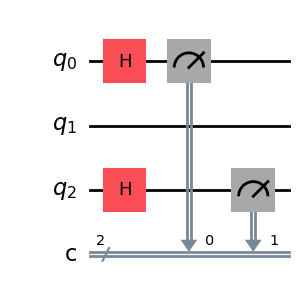

In [8]:
# 5. Measure a subset of qubits
from qiskit import QuantumCircuit
qc5 = QuantumCircuit(3, 2)
qc5.h([0, 2])
qc5.measure([0, 2], [0, 1])
qc5.draw('mpl')

In [9]:
#...HOWEVER, Notice that if you explicitly list the classical registers when you measure, then you need to have initialized them.
#  E.g. the following code throws an error:

# from qiskit import QuantumCircuit
# qc2 = QuantumCircuit(3)
# qc2.h([0, 1, 2])
# qc2.measure([0, 1, 2], [0, 1, 2]) # Requires that you initialize 3 classical registers
# qc2.draw('mpl')

### Practice Examples: Gate Tensor Products

Below are several gate tensor product operations. Predict the output state and then verify using Qiskit.

In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Example 1: I⊗I⊗X on |000> → flips last qubit to |001>
state1 = Statevector.from_label('000')
qc1 = QuantumCircuit(3)
qc1.x(2)
print('Example 1 result:', state1.evolve(qc1.to_instruction()))

# Example 2: X⊗X on |00> → flips both qubits to |11>
state2 = Statevector.from_label('00')
qc2 = QuantumCircuit(2)
qc2.x(0); qc2.x(1)
print('Example 2 result:', state2.evolve(qc2.to_instruction()))

# Example 3: H⊗I on |10> → superposition on first qubit
state3 = Statevector.from_label('10')
qc3 = QuantumCircuit(2)
qc3.h(0)
print('Example 3 result:', state3.evolve(qc3.to_instruction()))

# Example 4: I⊗H⊗Z on |011> → H on second, Z on third
state4 = Statevector.from_label('011')
qc4 = QuantumCircuit(3)
qc4.h(1); qc4.z(2)
print('Example 4 result:', state4.evolve(qc4.to_instruction()))

Example 1 result: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Example 2 result: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Example 3 result: Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))
Example 4 result: Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
             -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))


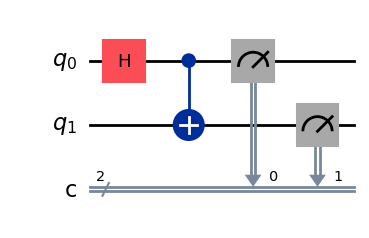

In [11]:
from qiskit import QuantumCircuit

# 2-qubit circuit with 2 classical bits
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
# Measure qubits into classical bits
qc.measure([0, 1], [0, 1])

qc.draw('mpl')

## Section 1.2.4 Multiple-Choice Questions

All practice questions are consolidated here. Answers are under collapsible toggles.

**Q1.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.ry(np.pi/3, 0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 0.25  
B. 0.75  
C. 0.5  
D. 1.0  
<details><summary>Answer</summary>
**A.** Using $R_y(\theta)\lvert0\rangle=\cos\!\big(\tfrac{\theta}{2}\big)\lvert0\rangle+\sin\!\big(\tfrac{\theta}{2}\big)\lvert1\rangle$, with $\theta=\pi/3$: $P(1)=\sin^2(\pi/6)=0.25$.

- **B (0.75):** Would require $\sin^2(\theta/2)=0.75$ (e.g., $\theta\approx 2\pi/3$), not $\pi/3$.  
- **C (0.5):** Occurs at $\theta=\pi/2$, not $\pi/3$.  
- **D (1.0):** Occurs at $\theta=\pi$, not $\pi/3$.
</details>

---

**Q2.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.rx(np.pi, 0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 0.0  
B. 0.5  
C. 1.0  
D. 0.25  
<details><summary>Answer</summary>
**C.** $R_x(\pi)\lvert0\rangle=-i\lvert1\rangle$; global phase is irrelevant, so $P(1)=1$.

- **A (0.0):** Would mean the state stayed at $\lvert0\rangle$, but $R_x(\pi)$ flips it.  
- **B (0.5):** Would occur at $\theta=\pi/2$ (equal superposition), not $\pi$.  
- **D (0.25):** No standard single-axis $\pi$ rotation produces this on $\lvert0\rangle$.
</details>

---

**Q3.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.x(0)
qc.rz(np.pi/7, 0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 1.0  
B. 0.0  
C. 0.5  
D. 0.1464  
<details><summary>Answer</summary>
**A.** After $X$, the state is $\lvert1\rangle$. $R_z$ adds only a phase, leaving Z-basis probabilities unchanged.

- **B (0.0):** Would require the state $\lvert0\rangle$, but we flipped to $\lvert1\rangle$.  
- **C (0.5):** Would require a superposition (e.g., $H\lvert0\rangle$), not a pure basis state.  
- **D (0.1464):** No—$R_z$ does not change measurement probabilities in the computational basis.
</details>

---

**Q4.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.h(0)
qc.rz(np.pi/3, 0)
qc.h(0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 0.75  
B. 0.25  
C. 0.5  
D. 1.0  
<details><summary>Answer</summary>
**B.** $H R_z(\phi) H = R_x(\phi)$. Thus the circuit equals $R_x(\pi/3)\lvert0\rangle$, giving $P(1)=\sin^2(\pi/6)=0.25$.

- **A (0.75):** Would be $\sin^2(\pi/3)$, i.e., $R_x(2\pi/3)$, not $\pi/3$.  
- **C (0.5):** Would require $\phi=\pi/2$, not $\pi/3$.  
- **D (1.0):** Would require a full flip ($\phi=\pi$).
</details>

---

**Q5.** Given:
```python
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.reset(range(2))
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
```
What is the probability that **qubit 1** is measured as `1`?  
A. 0.0  
B. 0.25  
C. 0.5  
D. 1.0  
<details><summary>Answer</summary>
**C.** State is $(\lvert00\rangle+\lvert11\rangle)/\sqrt{2}$. Each qubit marginally has $P(0)=P(1)=\tfrac{1}{2}$.

- **A (0.0):** Qubit 1 is not fixed; it’s correlated but marginal is uniform.  
- **B (0.25):** No—Bell state marginals are not biased.  
- **D (1.0):** Would require qubit 1 deterministically $\lvert1\rangle$, which it isn’t.
</details>
